# Playfair analysis

Importation de la librairie et chargement des données.

In [85]:
import pandas as pd
playfair = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv")

On regarde le début et la fin du dataframe pour avoir un premier sentiment sur les données

In [86]:
playfair.head()


Unnamed: 0  Year  Wheat  Wages
0           1  1565   41.0   5.00
1           2  1570   45.0   5.05
2           3  1575   42.0   5.08
3           4  1580   49.0   5.12
4           5  1585   41.5   5.15

In [87]:
playfair.tail()

Unnamed: 0  Year  Wheat  Wages
48          49  1805   81.0   29.5
49          50  1810   99.0   30.0
50          51  1815   78.0    NaN
51          52  1820   54.0    NaN
52          53  1821   54.0    NaN

Comme il n'y a pas beaucoup de données on peut vérifier la qualité par de simples graphiques.

On importe matplotlib et on visualise les deux variables principales; on ne constate pas de valeurs anormales. La variabilité du prix du blé est plus grande que celle des salaires. Cela parait normal. 

In [88]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8) # afin que les graphiques apparaissent en grand.

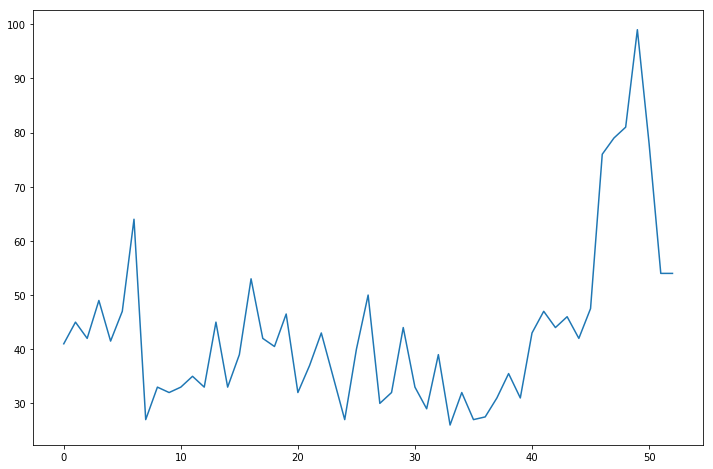

In [89]:
plt.plot(playfair['Wheat'])

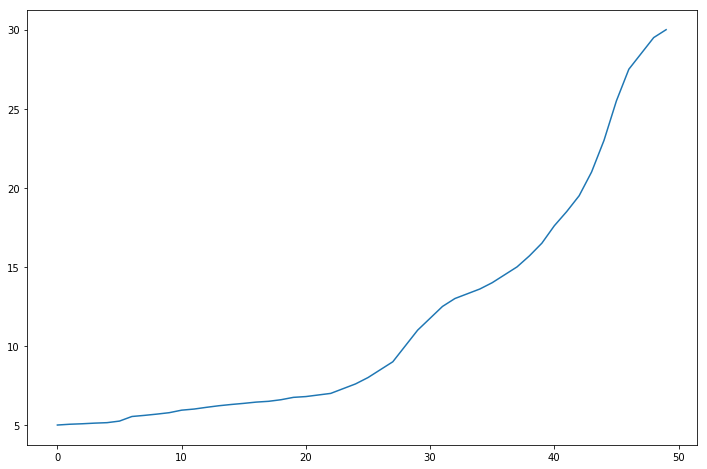

In [90]:
plt.plot(playfair['Wages'])

On prend l'année comme index. Cela permettra que l'année figure comme abscice dans les graphiques

In [91]:
playfair.set_index('Year')

Unnamed: 0  Wheat  Wages
Year                          
1565           1   41.0   5.00
1570           2   45.0   5.05
1575           3   42.0   5.08
1580           4   49.0   5.12
1585           5   41.5   5.15
1590           6   47.0   5.25
1595           7   64.0   5.54
1600           8   27.0   5.61
1605           9   33.0   5.69
1610          10   32.0   5.78
1615          11   33.0   5.94
1620          12   35.0   6.01
1625          13   33.0   6.12
1630          14   45.0   6.22
1635          15   33.0   6.30
1640          16   39.0   6.37
1645          17   53.0   6.45
1650          18   42.0   6.50
1655          19   40.5   6.60
1660          20   46.5   6.75
1665          21   32.0   6.80
1670          22   37.0   6.90
1675          23   43.0   7.00
1680          24   35.0   7.30
1685          25   27.0   7.60
1690          26   40.0   8.00
1695          27   50.0   8.50
1700          28   30.0   9.00
1705          29   32.0  10.00
1710          30   44.0  11.00
1715          31   33.0  11.75
1720          32   29.0  12.50
1725          33   39.0  13.00
1730          34   26.0  13.30
1735          35   32.0  13.60
1740          36   27.0  14.00
1745          37   27.5  14.50
1750          38   31.0  15.00
1755          39   35.5  15.70
1760          40   31.0  16.50
1765          41   43.0  17.60
1770          42   47.0  18.50
1775          43   44.0  19.50
1780          44   46.0  21.00
1785          45   42.0  23.00
1790          46   47.5  25.50
1795          47   76.0  27.50
1800          48   79.0  28.50
1805          49   81.0  29.50
1810          50   99.0  30.00
1815          51   78.0    NaN
1820          52   54.0    NaN
1821          53   54.0    NaN

On n'a plus besoin de la colonne qui numérote les observations

In [92]:
playfair=playfair.drop(columns='Unnamed: 0')

On vérifie le type des variables et le nombre de variables non nulles. Les 3 NaN du salaire correspondent aux trois dernières observations.

In [93]:
playfair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
Year     53 non-null int64
Wheat    53 non-null float64
Wages    50 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


Les années vont de 5 en 5 sauf la dernière qui a les mêmes valeurs que l'avant dernière. On élimine donc la dernière observation qui n'apporte rien. 

In [94]:
playfair=playfair[:-1]


 On vérifie que les années vont bien de de 5 en 5 et qu'il y a pas d'anomalies

In [95]:
playfair['Year'].tolist()==list(range(1565,1825,5))

True

Voici le graphique, il est moins beau que celui crée par William Playfair car je ne maitrise pas matplotlib. Tout d'abord, je ne comprends pas pourquoi le 'plot' et 'fill_between' exécutés après le 'bar' ne recouvrent pas le bas des barres. D'autre part, lorsque l'on spécifie 'blue' comme couleur, les barres grises apparaissent décalées. En outre, il n'y a pas dans librairie de matplotlib la possibilité de faire apparaitre un gradient dans les barres comme c'est sur le graphique de William Playfair. Enfin, je ne connais pas bien pandas et je ne sais pas s'il est possible de simplifier le code en créant le graphique directement depuis pandas.  

In [96]:
t = playfair['Year']
wheat = playfair['Wheat']
wages = playfair['Wages']

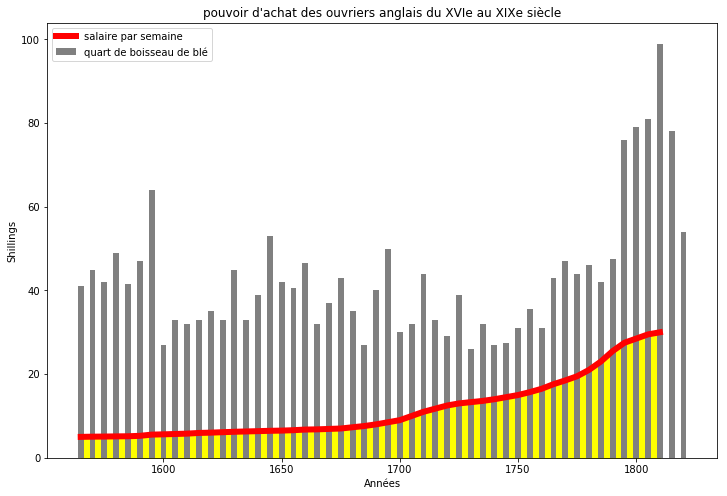

In [97]:
plt.bar(t,wheat,width=2.5,label='quart de boisseau de blé',color='grey')
plt.plot(t,wages,label='salaire par semaine',color='red', linewidth=6)
plt.fill_between(t,wages,color='yellow') # color='blue' donne une bug sur le graphe
plt.xlabel('Années')
plt.ylabel('Shillings')
plt.legend()
plt.title('pouvoir d\'achat des ouvriers anglais du XVIe au XIXe siècle')
plt.show()

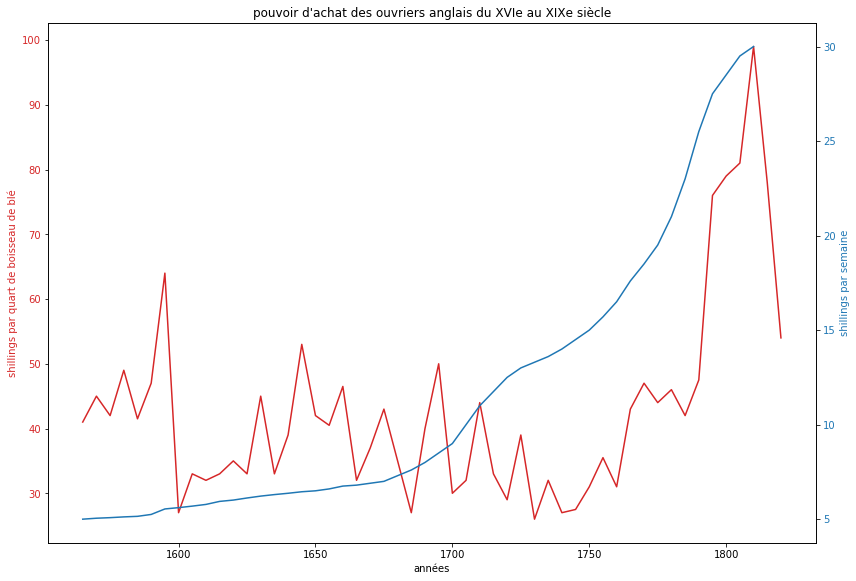

In [98]:

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('années')
ax1.set_ylabel('shillings par quart de boisseau de blé', color=color)
ax1.plot(t, wheat, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('shillings par semaine', color=color)  # we already handled the x-label with ax1
ax2.plot(t, wages, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('pouvoir d\'achat des ouvriers anglais du XVIe au XIXe siècle')
plt.show()

In [ ]:
On fait un nuage de points pour explorer un lien entre les variables salaire et prix du blé.

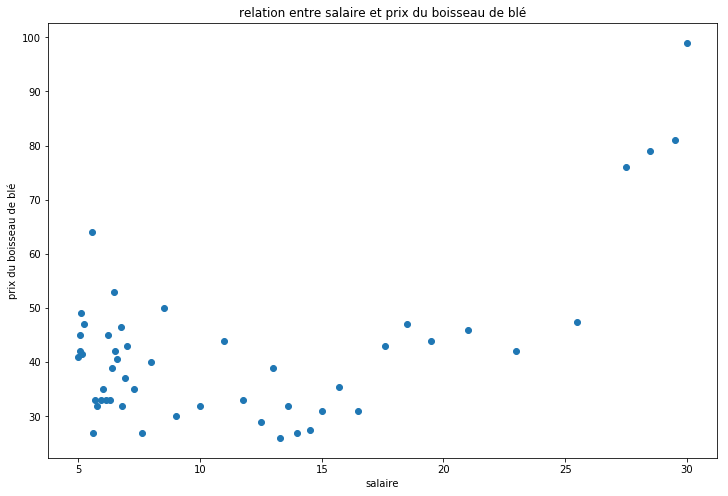

In [99]:

plt.scatter(wages, wheat)
plt.title('relation entre salaire et prix du boisseau de blé')
plt.xlabel('salaire')
plt.ylabel('prix du boisseau de blé')
plt.show()

On pourrait penser à un lien entre salaire et prix du blé. Cependant lorsque l'on écarte les 4 dernières observations complètes ce lien disparait. Voir ci-dessous la p value de la deuxième régression linéaire. 

In [111]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(wages[:-2], wheat[:-2]) # 2 dernières valeurs de wages NaN
print(slope, intercept, r_value, p_value, std_err)
slope, intercept, r_value, p_value, std_err = stats.linregress(wages[:-6], wheat[:-6]) # en écartant les 6 dernières valeurs
print(slope, intercept, r_value, p_value, std_err)

1.1773237582646006 28.504707161282703 0.5804770220993162 9.922208590956928e-06 0.23837583417931185
-0.03869995289807287 38.91175052531497 -0.02580813850189855 0.8648132219376652 0.2259866249749439


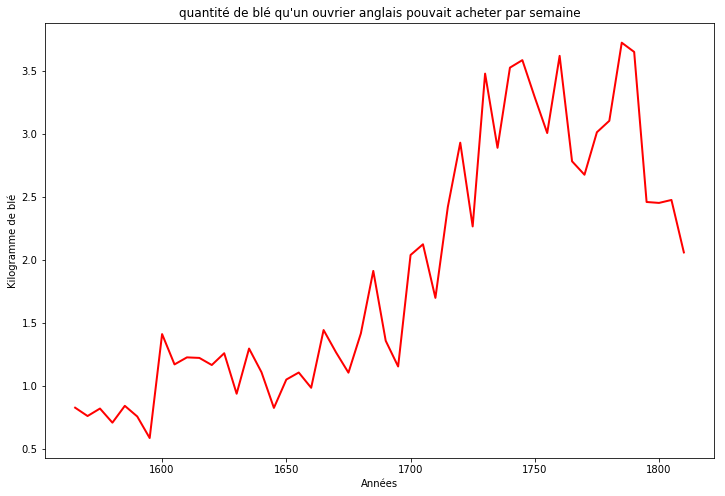

In [107]:
plt.plot(t,6.8*wages/wheat,label='pouvoir d\'achat',color='red', linewidth=2)
plt.title('quantité de blé qu\'un ouvrier anglais pouvait acheter par semaine')
plt.xlabel('Années')
plt.ylabel('Kilogramme de blé')
plt.show()

## Conclusion

On remarque que le pouvoir d'achat de l'ouvrier, compté en kg de blé (denré principale de l'époque) a considérablement augmenté (par un facteur 3) entre le XVIe au XIXe siècle. L'essentiel de cette progression est entre les années 1650 et 1750. Enfin cette progression stagne entre les années 1795 et 1810 où le prix du blé augmente. Cela est probablement causé par la révolution française et les guerres napoléoniennes. 